In [2]:
import h5py
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_validate, KFold

In [3]:
test_size    = 0.20
h5_color     = 'C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/Dataset_transformado_lab/color_features.h5'
h5_colorLb   = 'C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/Dataset_transformado_lab/color_features_labels.h5'
h5_texture   = 'C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/Dataset_transformado_lab/textural_features.h5'
h5_textureLb = 'C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/Dataset_transformado_lab/textural_features_labels.h5'
scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score, average = 'weighted'), 
                'precision' : make_scorer(precision_score, average = 'weighted'),
                'recall' : make_scorer(recall_score, average = 'weighted')}

In [27]:
#cargar los datos
h5f_color   = h5py.File(h5_color, 'r')
h5f_colorLb = h5py.File(h5_colorLb, 'r')

color_features_string          = h5f_color['Pest_Color_Features']
color_features_labels_string   = h5f_colorLb['Pest_Color_Features_Labels']

color_features = np.array(color_features_string)
color_features_labels  = np.array(color_features_labels_string)

h5f_color.close()
h5f_colorLb.close()

print("features shape: {}".format(color_features.shape))
print("labels shape: {}".format(color_features_labels.shape))

features shape: (1186, 512)
labels shape: (1186,)


In [5]:
h5f_texture  = h5py.File(h5_texture, 'r')
h5f_textureLb = h5py.File(h5_textureLb, 'r')

textural_features_string          = h5f_texture['Pest_Textural_Features']
textural_features_labels_string   = h5f_textureLb['Pest_Textural_Features_Labels']

textural_features = np.array(textural_features_string )
textural_features_labels  = np.array(textural_features_labels_string)

h5f_texture.close()
h5f_textureLb.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(textural_features.shape))
print("[STATUS] labels shape: {}".format(textural_features_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (1186, 13)
[STATUS] labels shape: (1186,)
[STATUS] training started...


In [6]:
global_features = np.hstack([color_features, textural_features])
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(textural_features_labels.shape))

[STATUS] features shape: (1186, 525)
[STATUS] labels shape: (1186,)


In [11]:
"""
    Se implementa la separación de las correspondientes caracteristicas considerando su importancia
"""
X = global_features
y = color_features_labels

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size   = test_size,
                                                    random_state = 15)

X_train.shape, X_test.shape

((948, 525), (238, 525))

In [13]:
"""
    Declaración del kernel a implementar
"""
sigmoid_param_grid = {
        "kernel": ["sigmoid"],
        "gamma": ["auto", "scale"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}

In [14]:
"""
    En base al kernel declarado se corresponde implementar SVM con el tipo de kernel
    sigmoid.
    Para posterior empezar su entrenamiento correspondiente
"""
svm_sigmoid = GridSearchCV(svm.SVC(), sigmoid_param_grid)
history = svm_sigmoid.fit(X_train,y_train)

In [15]:
"""
    En base al modelo entrenado se corresponde en obtener las metricas correspondientes del modelo
"""
y_pred = svm_sigmoid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Sigmoid Kernel): ', "%.2f" % (accuracy*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (f1*100))
print('Precision (Sigmoid Kernel): ', "%.2f" % (precision*100))
print('Recall (Sigmoid Kernel): ', "%.2f" % (recall*100))

Accuracy (Sigmoid Kernel):  93.70
F1 (Sigmoid Kernel):  93.63
Precision (Sigmoid Kernel):  93.61
Recall (Sigmoid Kernel):  93.70


Al observar la implementación correspondiente del modelo se ha logrado obtener como desarrollo final. Considerando las cuatro clases de pestes presentes se ha obtenido que el modelo puede realizar una predicción correspondiente del 93.70% de los datos que este reciba. Donde se determina que este modelo puede llegar a detectar en ese porcentaje y clasificar cada tipo de plaga o diferenciar entre hojas sanas o enfermas con las plagas mecionadas. a su vez se ha determinado que este tiene una precision referente al 93.61% en el reconocimiento de plagas

# Cross Validation

In [16]:
"""
    Se implementa cross validate para verificar la funcionalidad y efectividad del modelo correspondiente.
"""
results = cross_validate(estimator=svm_sigmoid, X=X_train, y=y_train, cv=8, scoring=scoring)

print('Accuracy (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_accuracy'])*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_f1_score'])*100))
print('Precision (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_precision'])*100))
print('Recall (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_recall'])*100))

Accuracy (Sigmoid Kernel):  93.88
F1 (Sigmoid Kernel):  93.88
Precision (Sigmoid Kernel):  94.12
Recall (Sigmoid Kernel):  93.88


Como se conoce en este caso se corresponde considerar que al aplicar cross validate el modelo realizar las correspondientes pruebas para validar la información que este procesa. Por lo cual al implementar esta función se determina que el modelo puede determinar con una exactitud del 93.88 % la clasificación correspondiente en las multiples clases que se han presentado. Tanto como para Blackrot, Esca, Leaf Blight las cuales son plagas de las vid, como para hojas sanas.

# Matriz de confusión

In [17]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

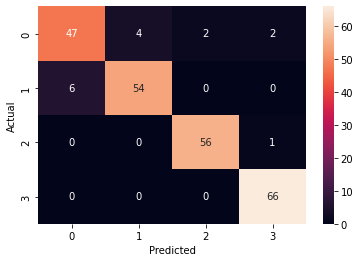

In [21]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

Al implementar la correspondiente matriz de confusión se determina los siguientes valores para su analisis. Para la clase de Blackrot se ha determinado el valor de 0, para la clase de Esca se ha detemrinado el valor de 1, para la clase de Leaf Blight se determino el valor de 2 y finalizando con la clase sana con valor de 3. Para lo cual el modelo ha determinado que al momento de ignresar las hojas con plaga ha determinado que 47 hojas con blackrot las ha predicho como verdadera. A su vez ha determinado que 4 hojas que han ingresado al modelo las ha determinado como Esca, a 2 hojas de blackrot las ha determinado como leaf blight y por ultimo 2 hojas las ha determinado como sanas. En caso de la clase de Esca ha logrado determinar que 54 hojas que han ingresado con esa plaga las 54 las ha predicho como la plaga que corresponde. Dando como resultado la clasificación de 6 hojas entrantes como Esca, dando resultado Blackrot. Por utlimo ha determinado la plaga de Leaf Bligh con una efectividad de 56 hojas entrantes y predichas de la misma clase, diferenciando  unicamente una hoja como sana. Por ultimo la clase de hoja sana ha determinado que de las 66 hojas ingresadas las 66 las ha predicho como hojas sanas.